<a href="https://colab.research.google.com/github/GUC-DM/w25-mini-project-3-george-samy-t05-yassin-ahmed-t05/blob/main/Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
print(df.head())

                   genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3              a cappella      0.676557      0.538961  1.906285e+05  0.316434   
4                abstract      0.459210      0.516167  3.431965e+05  0.442417   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   
4          0.849667  0.118067 -15.472083     0.046517  127.885750  0.307325   

   popularity  key  
0   27.833333    

=====================================================================================================

#Data Inspection

In [3]:
print(df.describe())

       acousticness  danceability   duration_ms       energy  \
count   2972.000000   2972.000000  2.972000e+03  2972.000000   
mean       0.401157      0.537190  2.517272e+05     0.561190   
std        0.319781      0.150693  9.467215e+04     0.234511   
min        0.000003      0.056900  3.094600e+04     0.001002   
25%        0.119036      0.441169  2.063674e+05     0.395030   
50%        0.321706      0.546511  2.375479e+05     0.601264   
75%        0.674088      0.647536  2.773008e+05     0.730202   
max        0.996000      0.929000  2.382587e+06     0.994667   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       2972.000000  2972.000000  2972.000000  2972.000000  2972.000000   
mean           0.211368     0.192791   -10.509249     0.083580   119.020796   
std            0.267374     0.092370     5.370006     0.080495    17.471762   
min            0.000000     0.022200   -41.825000     0.023800    47.135722   
25%            0.004829     

this give us more info about each column like mean and std and the quartlies

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB
None


.info() help us know null values in each column and as we can see here theses no null values at all and help us to see data type of each column

=====================================================================================================

#Questions

##*Q1*: Find factors affecting popularit


Features sorted by absolute correlation with popularity:
acousticness       -0.458546
loudness            0.344315
energy              0.337657
instrumentalness   -0.265516
danceability        0.218019
tempo               0.146617
liveness           -0.094092
duration_ms        -0.071111
speechiness        -0.045112
valence             0.023117
key                 0.008700
Name: popularity, dtype: float64


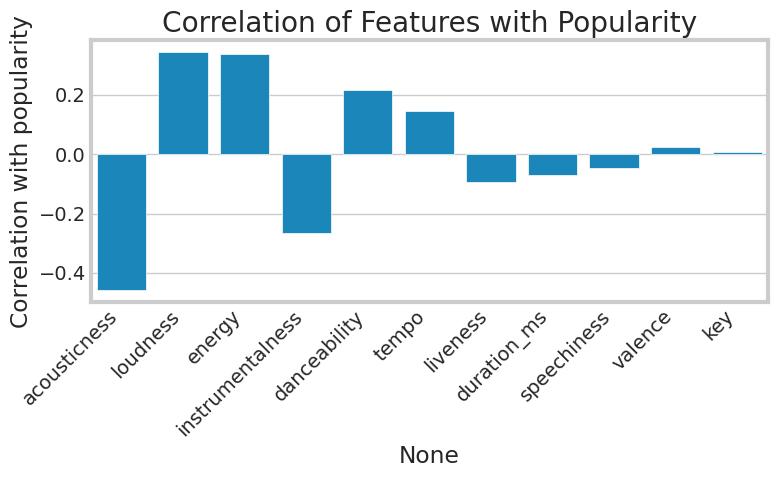

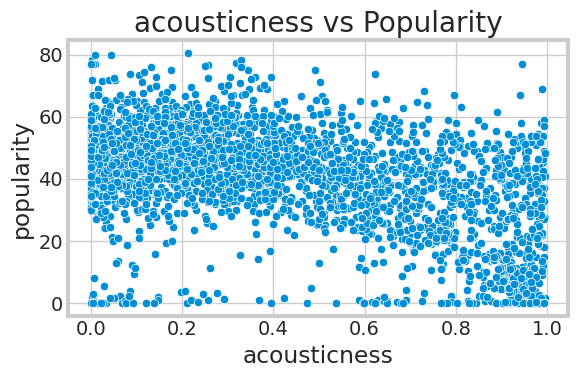

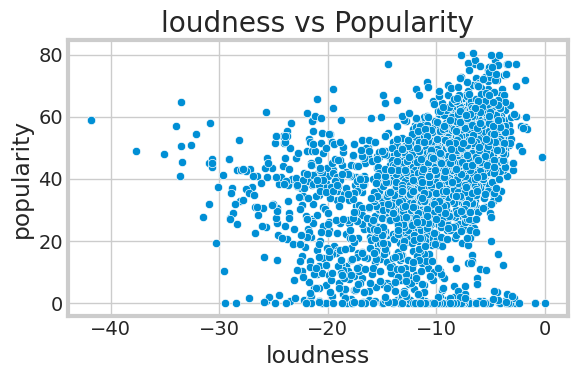

In [5]:

corr_with_pop = df.corr(numeric_only=True)["popularity"].sort_values(ascending=False)


# drop the correlation of popularity with itself and sort by absolute value
corr_with_pop_no_self = corr_with_pop.drop("popularity")
corr_with_pop_abs_sorted = corr_with_pop_no_self.reindex(corr_with_pop_no_self.abs().sort_values(ascending=False).index)

print("\nFeatures sorted by absolute correlation with popularity:")
print(corr_with_pop_abs_sorted)

# barplot of correlation with popularity (excluding popularity itself)
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_pop_abs_sorted.index, y=corr_with_pop_abs_sorted.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation with popularity")
plt.title("Correlation of Features with Popularity")
plt.tight_layout()
plt.show()

# scatterplots for the top 2 most correlated features with popularity
top2_features = corr_with_pop_abs_sorted.index[:2]  # take the two strongest features

for feat in top2_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feat], y=df["popularity"])
    plt.xlabel(feat)
    plt.ylabel("popularity")
    plt.title(f"{feat} vs Popularity")
    plt.tight_layout()
    plt.show()

here we answering this question by finding correlation to see which attributes affect it the popularity the most wether its negative corr or pos corr
first we make a variable and to get the corr with all attributes with pop and sort them then drop pop to exclude the corr with it self which will always be 1 then we make it .abs() to exclude the sign which is positivee or negative then sort the valuse again and as we can see from the graph the top 2 attributes which affect the popularity are
acounticness=-0.459 which is neg corr with pop and loudness=0.344 which is pos corr with it  then we made scatter plot for the top 2 attributes which affect the pop to see the relation in focus as we can see when acounticness decrease by 1 the pop increase by 0.45 and as the loudness of the song increase by 1 the pop increase by 0.344

=====================================================================================================

##*Q2*: Most and least popular genres

MOST POPULAR: basshall = 80.6666666666667
LEAST POPULAR: veena = 0.0357142857142857


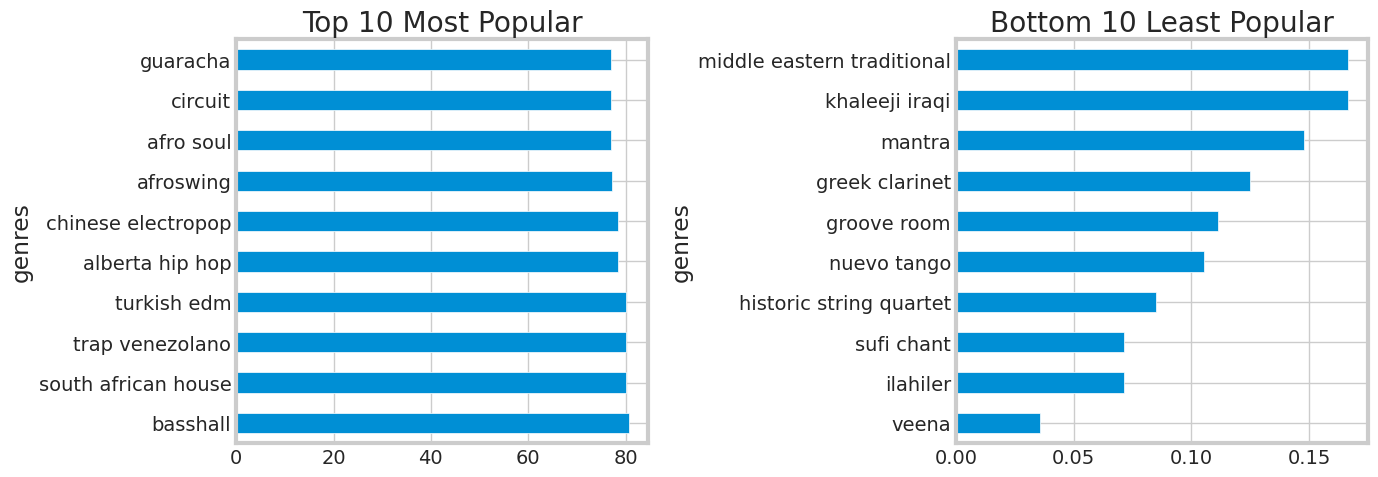

In [6]:
# Average popularity by genre
genre_pop = df.groupby('genres')['popularity'].mean()

# Find most and least
most_pop = genre_pop.idxmax()
least_pop = genre_pop[genre_pop > 0].idxmin()

print("MOST POPULAR:", most_pop, "=", genre_pop[most_pop])
print("LEAST POPULAR:", least_pop, "=", genre_pop[least_pop])

# Plot top 10 and bottom 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

genre_pop.nlargest(10).plot(kind='barh', ax=ax1)
ax1.set_title('Top 10 Most Popular')

genre_pop[genre_pop > 0].nsmallest(10).plot(kind='barh', ax=ax2)
ax2.set_title('Bottom 10 Least Popular')

plt.tight_layout()
plt.show()

here we want to see most and least popular genre so we group by genre and select only pop column for each group then calc the mean then we use .indxmax and .indxmin to get the top and least one and also in least_pop we make it genre_pop>0 because we want the least non zero ones then print the most and least popular one and plot the top and least 10 in barchart using the variable we made which is genre_pop and as we can see here the top popular genre is pop and least popular genre is veeena with means =80.6 and 0.03 respectevly

=====================================================================================================

##*Q3*:Most correlated pairs

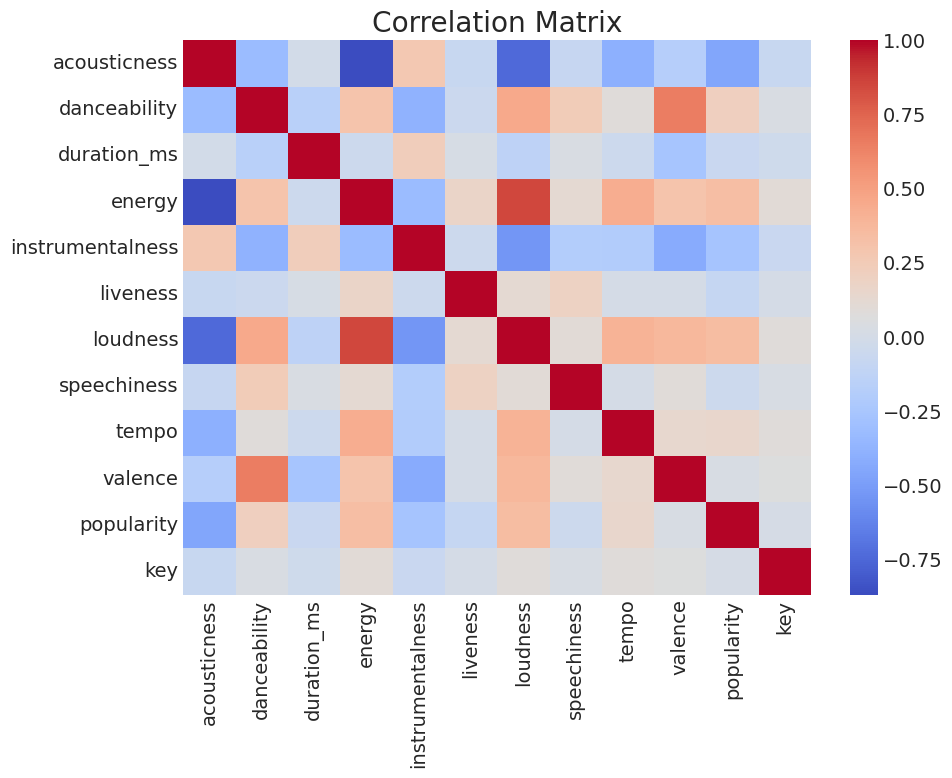

TOP 2 CORRELATED PAIRS:
1. acousticness & energy: -0.868
2. energy & loudness: 0.849


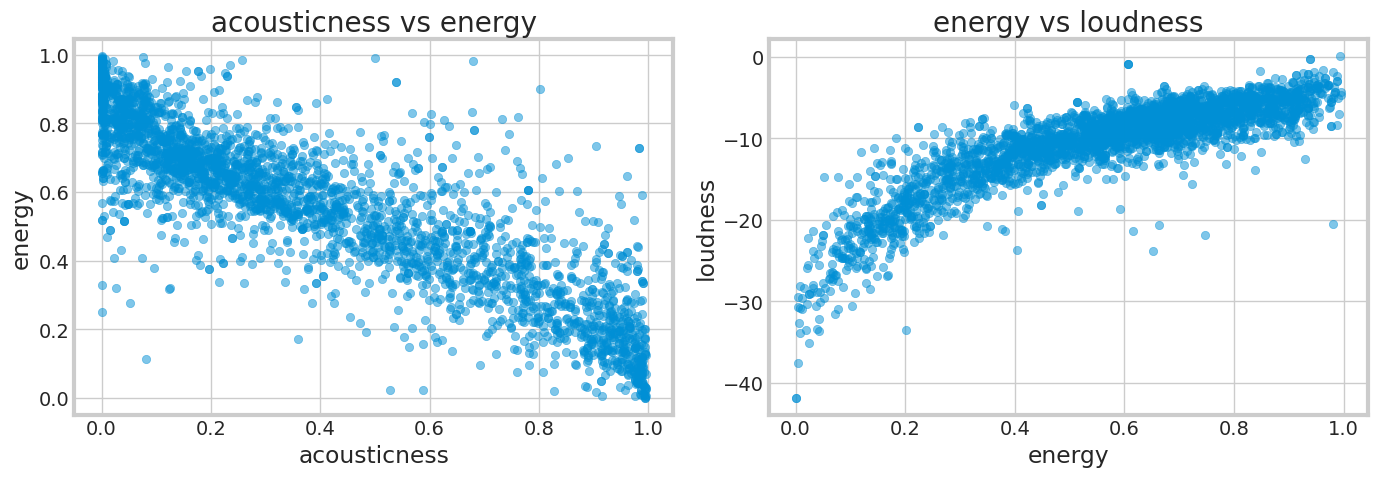

In [7]:
corr_mat = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Find top 2 correlated pairs
pairs = []
cols = corr_mat.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pairs.append((cols[i], cols[j], corr_mat.iloc[i, j]))

pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("TOP 2 CORRELATED PAIRS:")
for idx, (feat1, feat2, corr) in enumerate(pairs[:2], 1):
    print(f"{idx}. {feat1} & {feat2}: {corr:.3f}")

# Plot scatter for top 2 pairs
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for idx, ax in enumerate(axes):
    feat1, feat2, _ = pairs[idx]
    ax.scatter(df[feat1], df[feat2], alpha=0.5)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_title(f'{feat1} vs {feat2}')

plt.tight_layout()
plt.show()

as we can see here we want to get the top 2 corr attributes so we will make a heatmap to show corr of each 2 attributes and then make a nested loop which will result in a list which ontain each 2 pairs and the corr number ir works by  looping on all varibales and see the corr between them and put them into a list called pairs then take this list and sort it by the abs corr number from strong to weak then make a loop to get only the first 2 pairs from the list we sorted then print them and make a scatter plot for each as we can see the top 2 pairs which affects each others are acousticness & energy: -0.868 (neg corr)  and   energy & loudness: 0.849 (pos corr)

=====================================================================================================

##*Q4* :  Word frequency in genres

TOP WORDS IN GENRES:
pop: 240
indie: 237
rock: 183


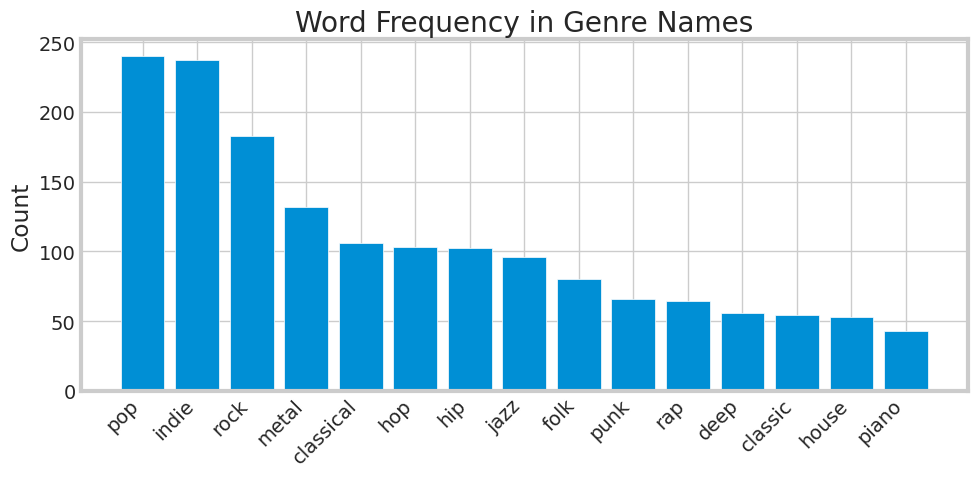

In [8]:

all_genres_text = ' '.join(df['genres'].str.lower())

# Split into words and count
words_list = all_genres_text.split()
word_frequency = Counter(words_list)

# Get top 15 words
top_words = word_frequency.most_common(15)
word_names = [w[0] for w in top_words]
word_counts_val = [w[1] for w in top_words]

print("TOP WORDS IN GENRES:")
for word, count in top_words[:3]:
    print(f"{word}: {count}")

# Plot
plt.figure(figsize=(10, 5))
plt.bar(word_names, word_counts_val)
plt.title('Word Frequency in Genre Names')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

get all genres and put them as one string and lower cass all to unify format then put them into a list each on as separated string and separte with commas then count the occurance of each word and make dict named word_frequancy to store the word and beside it the frequancy then comma then the next word  {'x': 450, 'y': 380}then get the top 15 and put them in list word_names using a small loop and do the same for the count which means make a list include the couunt of each on of them by order first genre in word_names crosspond to the first number in the word_counts_val then print the top 3 and plot the top 15 as we can see the most popular 3 are
pop: 240
indie: 237
rock: 183

=====================================================================================================

##*Q5*:New Relation

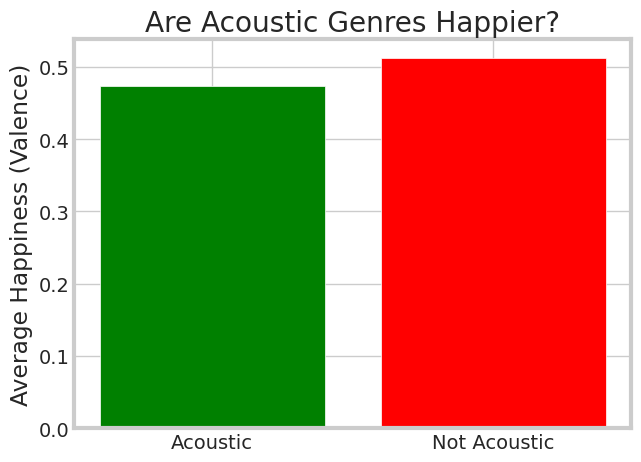

In [9]:
# Q5: Do Acoustic Genres Sound Happier?

# Split into 2 groups
acoustic = df[df['acousticness'] > df['acousticness'].median()]['valence'].mean()
not_acoustic = df[df['acousticness'] <= df['acousticness'].median()]['valence'].mean()


# Bar chart
plt.bar(['Acoustic', 'Not Acoustic'], [acoustic, not_acoustic], color=['green', 'red'])
plt.ylabel('Average Happiness (Valence)')
plt.title('Are Acoustic Genres Happier?')
plt.show()

here we showed new relation between acoustic and valence
here we split the genre into 2 groups high and low acousticness(having instruments) and measure happines  (valence) for the high group and the low group so in the code we splited them and make group which thier acousticness above the median and named it acoustic and the others which are below median named not_acoustic and calc the median happiness for each group then plot them on bar chart so we can see that notacoustic are more valence than acoustic and this viz answer the question"Are Acoustic Genres Happier?"

================================================================================

#*model-building & interpretation phases*

In [10]:

features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

X = df[features]  # Extract features into a new dataframe


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

first of all we should feature eng and select only the needed attributes for clustring so we will exclude genres which is categoral so we can measure the distance between it and the centriod and key becauce its not a main focus and popularity because this one should be our outcomee varibale note: attributes should be numeric for kmeans clustring to help us get centriod and measure the distance between points and centriods and the resulting shape of the cludters should be convex or spherical and all points should be included in a cluster and cludter should not be overlapping and a point should only be in only 1 cluster
then we gonna normlize useing the predefined method fit.transform to ensure that all points on the same scale and non of them dominate the effect on th eout put this method uses z-score normlization

===========================================================================================================

##*Elbow method to find best k*

WCSS Values for Each k:
k=2: WCSS=22094.42
k=3: WCSS=19588.33
k=4: WCSS=17745.17
k=5: WCSS=16050.60
k=6: WCSS=15216.00
k=7: WCSS=14243.26
k=8: WCSS=13625.77
k=9: WCSS=12802.96
k=10: WCSS=12202.30
k=11: WCSS=11738.94
k=12: WCSS=11380.66
k=13: WCSS=11024.01


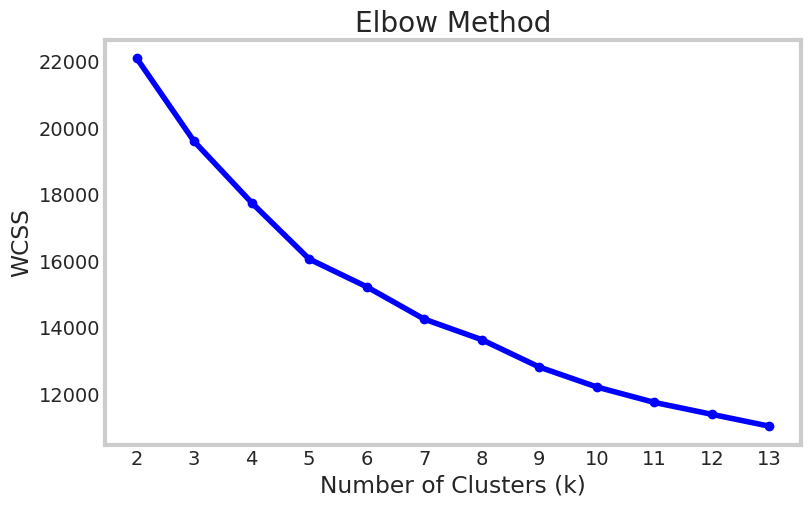

In [11]:

wcss_values = []
for k in range(2, 14):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss_values.append(km.inertia_)

# Print WCSS for each k
print("WCSS Values for Each k:")
for k, wcss in zip(range(2, 14), wcss_values):
    print(f"k={k}: WCSS={wcss:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 14), wcss_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(2, 14))
plt.grid()
plt.show()


here we need to decide which k we will cboose so one of the methods i selbow method which is a graph between number of k and wss which is within cluster sum of square(how close the points are in the cluster) and the lower it is the better and we see the progress when increasing number of k and how it affect the wss and when the diffrances start to get lower heres the elbow is hsowen in the graph and we chose the k which after it the progress of wss is getting small which means increasing k has no big effect now this help us find the best balance between wss and number of k as we can see in the code we made a empty list called wcss_values and a loop to go from 2 to 12 because 1 clustrer means we didnt do any thing and more than 12 will be too much for this data set then we use k as number of cluster and init='k-means++' this help us to use a very smart starting point and n_init=10 which means we try 10 times for this and keep the best result and then apply this on the normlized attributes and the process is that we first find centers then calc ecludian distance betwwen center and each point and assign each point to the closest center and recalcuate centriods and loop till we reach max number of iterations or small progress(1%) then plot line graph showing each number of k resulted in which number in wcss as we can see from the ouput andn the graph k=5 is the best becuase diffrances before it are big and after it are small diffrance

===========================================================================================

##*Build final K-Means model with k=5*

In [12]:

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means with k={k}")
print("Genres per cluster:")
print(df['cluster'].value_counts().sort_index())

K-Means with k=5
Genres per cluster:
cluster
0    755
1    811
2    404
3     23
4    979
Name: count, dtype: int64


here we choose k=5  trained and it and put it to work to cluster the points and then print number of k and genre per cluster and as we can see that cluster 3 is the lowest number of genres and cluster 4 is the biggest
some notes about kmenas:
its effiecnet because is o(tkn) but we should take into codiseration that it always aim to local not golbal optimal and clusters must be convex shape and we must specify k as we did before applying and its very senstive to outluers and ofc its an unsupervised technique  

======================================================================================================

##Visualize clusters with PCA

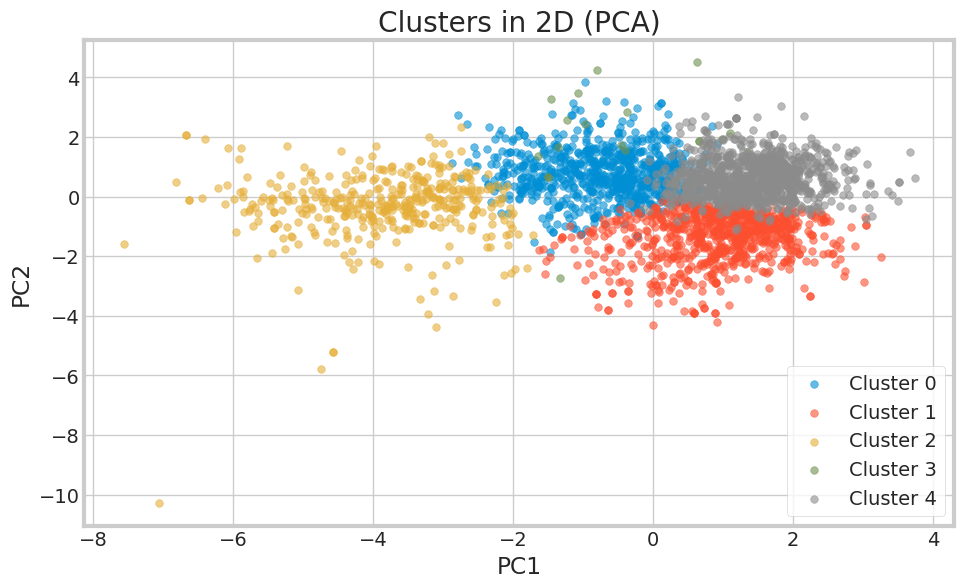

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
for i in range(k):
    mask = df['cluster'] == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {i}', s=30, alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in 2D (PCA)')
plt.legend()
plt.show()

here we can visulize the 5  clusters with each others using pca which means principle component analysis which reduce numbers of dimentality frim 10D (features selected) to 2D (pca1,pca2) as we see in the code pca = PCA(n_components=2) create pca machine and compress data to 2d then make a loop to loop on k and find all genres in cluster k then plot it

=================================================================================================

##Sample genres from each cluster

In [14]:

print("SAMPLE GENRES FROM EACH CLUSTER:")
for cluster_id in range(k):
    sample_genres = df[df['cluster'] == cluster_id]['genres'].sample(5, random_state=42).tolist()
    print(f"Cluster {cluster_id}: {sample_genres}")

SAMPLE GENRES FROM EACH CLUSTER:
Cluster 0: ['halloween', 'pet calming', 'bahai', 'brass band', 'nepali indie']
Cluster 1: ['dutch blues', 'orgcore', 'destroy techno', 'finnish heavy metal', 'nordic post-rock']
Cluster 2: ['canadian choir', 'irish indie', 'university choir', 'avant-garde jazz', 'baroque brass']
Cluster 3: ['latino comedy', 'gospel italiano', 'black comedy', 'ghanaian traditional', 'motivation']
Cluster 4: ['conscious hip hop', 'mexican indie', 'classic belgian pop', 'uk reggae', 'bachata dominicana']


here we are tyring to show a sample of each cluster by looping on each cluster and randomize 5 genres from each cluster to see a smaple

==================================================================================================

##*Cluster Interpretation*


Average Feature Values per Cluster:
         acousticness  danceability  duration_ms  energy  instrumentalness  \
cluster                                                                      
0                0.66          0.53    224810.50    0.40              0.16   
1                0.11          0.48    265878.29    0.77              0.24   
2                0.85          0.33    301084.80    0.19              0.60   
3                0.71          0.61    351339.27    0.39              0.02   
4                0.24          0.67    238054.07    0.67              0.07   

         liveness  loudness  speechiness   tempo  valence  
cluster                                                    
0            0.19    -11.95         0.06  114.14     0.52  
1            0.22     -7.19         0.08  130.54     0.40  
2            0.17    -20.76         0.05  104.72     0.23  
3            0.38    -16.45         0.73  100.75     0.47  
4            0.18     -7.78         0.10  119.57     0.65

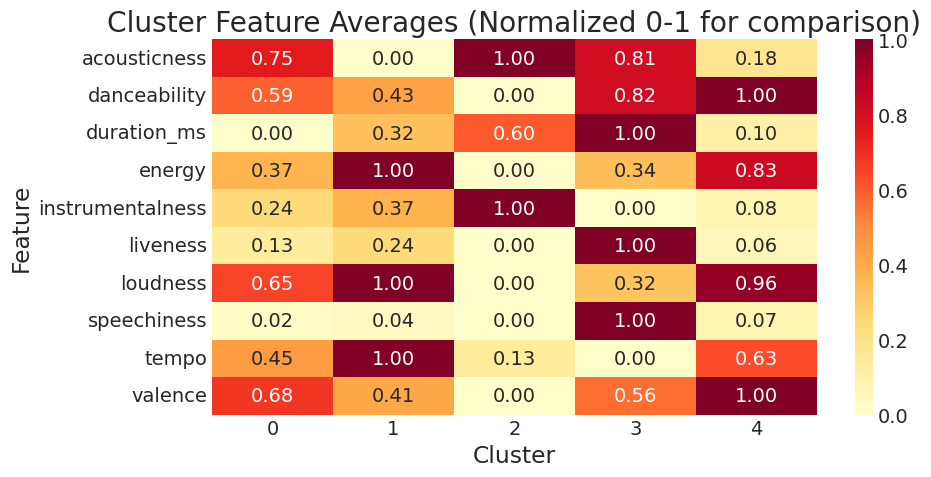

In [15]:
# Show what each cluster looks like by getting the average of each feature per cluster
cluster_means = df.groupby('cluster')[features].mean()

print("Average Feature Values per Cluster:")
print(cluster_means.round(2))

# This makes all features comparable on the same 0-1 scale
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Heatmap with NORMALIZED values so we can compare all features properly
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_means_normalized.T, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Cluster Feature Averages (Normalized 0-1 for comparison)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

this cell helps us see what makes each cluster unique first we calc the average of each feature for each cluster by grouping all rows by cluster and use .mean() for features column by column and show it as output then we normlized by min-max method to show a heat map we normilized because without normlizing the heatmap will be dominated by the duration_ms values then we print the heatmap as we can see in the heat map
cluster 0: is balanced because it have mid values for all features
cluster 1 : has high energy and high loudness and fast temp and low instrumentals (acoustic)
cluster 2 :has high acousticness and low energy which may be calm music
cluster 3 : high speech and livenss and long durations which may be rap and spoken songs
cluster 4 : high dance and happiness and energy which may be party beats or tracks

and these heatmap support the sampling from the prevous cell if we re run the code the sample wont be the same because it randomize eevry run

Cluster 0: ['halloween', 'pet calming', 'bahai', 'brass band', 'nepali indie']
Cluster 1: ['dutch blues', 'orgcore', 'destroy techno', 'finnish heavy metal', 'nordic post-rock']
Cluster 2: ['canadian choir', 'irish indie', 'university choir', 'avant-garde jazz', 'baroque brass']
Cluster 3: ['latino comedy', 'gospel italiano', 'black comedy', 'ghanaian traditional', 'motivation']
Cluster 4: ['conscious hip hop', 'mexican indie', 'classic belgian pop', 'uk reggae', 'bachata dominicana']

===========================================================================================

##Final Evaluation using Silhouette Score

In [16]:

final_score = silhouette_score(X_scaled, df['cluster'])

print("FINAL EVALUATION")
print("=" * 40)
print(f"Number of clusters: {k}")
print(f"Silhouette Score: {final_score:.4f}")



# Find genres that contain multiple main category words
main_words = ['pop', 'rock', 'jazz', 'hip', 'indie', 'metal', 'electronic']
overlapping = []
for genre in df['genres'].unique():
    genre_lower = genre.lower()
    matches = [w for w in main_words if w in genre_lower]
    if len(matches) >= 2:
        overlapping.append(genre)

print(f"\nGenres with multiple categories (e.g. pop AND rock):")
for g in overlapping[:10]:  # show first 10
    print(f"  - {g}")

FINAL EVALUATION
Number of clusters: 5
Silhouette Score: 0.1819

Genres with multiple categories (e.g. pop AND rock):
  - alternative pop rock
  - australian indie rock
  - belgian indie rock
  - british indie rock
  - chinese indie rock
  - danish pop rock
  - electronic rock
  - english indie rock
  - french indie pop
  - german pop rock


here we are appling silhouette score on x_scaled which are the selected normlized features and the clusters as we can see the score is 0.18
lets first explain the score scale : it goes from -1 to 1 the closer to the 1 the better and if its under zero its garbage accroding to the lecture 8 p2 explanation this score calcualtes
 (b(x)-a(x))/max(b(x)-a(x))
inter-cluster distance b(x) degree of separation  , intra-cluster distance a(x) cluster correctness
intra distance is the distance between the points within a cluster (better to be minimized)
and inter distance is the distance between cluster and other(better to be maximized)

the score is acceptable but not the best because there are alot of generes which are overlapping i showed this using the last section in this cell which loop on main_word and genres and find overlapping words and i printted a sample of it but the score is still acceptable because its above 0



***I recommend*** using it for recommending similar music genres

================================================================================

#*BONUS*

In [17]:
# BONUS: Function to recommend similar genres

def genre_recommender(genre_name, n=5):
    # Find the genre in dataset
    match = df[df['genres'].str.lower() == genre_name.lower()]

    if match.empty:
        return f"Genre '{genre_name}' not found"

    # Get its cluster
    cluster = match.iloc[0]['cluster']

    # Get other genres from same cluster
    similar = df[(df['cluster'] == cluster) & (df['genres'] != match.iloc[0]['genres'])]

    # Return random sample
    return similar.sample(min(n, len(similar)))['genres'].tolist()



print("\n>> genre_recommender('pop')")
print(genre_recommender('pop'))


>> genre_recommender('pop')
['salsa', 'japanese alternative rock', 'deep east coast hip hop', 'pirate', 'soft rock']


function finds what cluster the input genre belongs to then returns other genres from the same cluster since genres in the same cluster have similar audio features they are similar